<a href="https://colab.research.google.com/github/patelyash9775/Advanced-Python/blob/main/Advance%20Regression/02_Multiple_Regression_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TensorFlow 2: Advanced Linear & Lasso Regression in Python**

*Topic: Advanced Linear Regression*
  - *part-2: Feature Engineering*
    - *Lesson: Multiple Linear Regression*
    - *Lesson: LASSO Regression*
    - *Lesson: Feature Selection based on Penality Factor*

**PROJECT: CUSTOMER REVENUE PREDICTION**

In [ ]:
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

In [ ]:
os.chdir('drive/MyDrive/Advance Regression')

In [ ]:
ls preprocessing/

x_norm.pickle  y_norm.pickle


In [ ]:
import pickle


### **Loading Data**

In [ ]:
# loading preprocessed data
x = pickle.load(open('preprocessing/x_norm.pickle','rb'))
y = pickle.load(open('preprocessing/y_norm.pickle','rb'))

In [ ]:
x.drop('index',axis=1,inplace=True) # drop index

### **Multiple Linear Regression**
$\hat y = a + b_1 X_1 + b_2 X_2 + ... + b_n X_n $

In [ ]:
# convert into array
x = x.values
y = y.values

In [ ]:
x.shape , y.shape

((3189, 13), (3189, 1))

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [ ]:
# multiple linear regression
def multi_regression():
  model = Sequential([
                      layers.Dense(units=1,input_shape=(13,))
  ])
  # 
  loss = tf.keras.losses.mean_squared_error
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  # complie
  model.compile(loss=loss,optimizer=optimizer,metrics=['mse'])
  return model

In [ ]:
model = multi_regression()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2551, 13), (638, 13), (2551, 1), (638, 1))

In [ ]:
#train
history = model.fit(x_train,y_train,batch_size=100,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
26/26 [==============================] - 0s 7ms/step - loss: 2.3612 - mse: 2.3612 - val_loss: 2.2945 - val_mse: 2.2945
Epoch 2/200
26/26 [==============================] - 0s 2ms/step - loss: 2.0613 - mse: 2.0613 - val_loss: 1.9884 - val_mse: 1.9884
Epoch 3/200
26/26 [==============================] - 0s 2ms/step - loss: 1.8020 - mse: 1.8020 - val_loss: 1.7334 - val_mse: 1.7334
Epoch 4/200
26/26 [==============================] - 0s 3ms/step - loss: 1.5831 - mse: 1.5831 - val_loss: 1.5184 - val_mse: 1.5184
Epoch 5/200
26/26 [==============================] - 0s 3ms/step - loss: 1.3964 - mse: 1.3964 - val_loss: 1.3380 - val_mse: 1.3380
Epoch 6/200
26/26 [==============================] - 0s 3ms/step - loss: 1.2388 - mse: 1.2388 - val_loss: 1.1880 - val_mse: 1.1880
Epoch 7/200
26/26 [==============================] - 0s 3ms/step - loss: 1.1052 - mse: 1.1052 - val_loss: 1.0633 - val_mse: 1.0633
Epoch 8/200
26/26 [==============================] - 0s 3ms/step - loss: 0.9941 - m

In [ ]:
hist = history.history
df_hist = pd.DataFrame(hist)

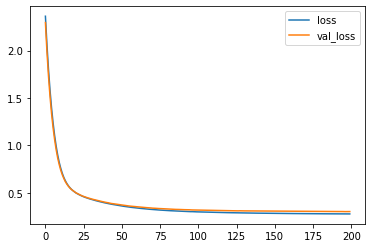

In [ ]:
df_hist[['loss','val_loss']].plot()

### **LASSO Regression**
- L1 Regularization

In [ ]:
from tensorflow.keras.regularizers import l1

In [ ]:
def lasso_regression(penality):
  model = Sequential([
                      layers.Dense(units=1,input_shape=(13,),kernel_regularizer=l1(penality))
  ])

  #loss and optimizer
  loss = tf.keras.losses.mean_squared_error
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  # compile
  model.compile(optimizer=optimizer,loss=loss)
  return model

In [ ]:
# different penality factors
penality = [1e-10,3e-10,6e-10,9e-10,
            1e-9,3e-9,6e-9,9e-9,
            1e-8,3e-8,6e-8,9e-8,
            1e-7,3e-7,6e-7,9e-7,
            1e-6,3e-6,6e-6,9e-6,
            1e-5,3e-5,6e-5,9e-5,
            1e-4,3e-4,6e-4,9e-4,
            1e-3,3e-3,6e-3,9e-3,
            1e-2,3e-2,6e-2,9e-2,
            1e-1,3e-1,6e-1,1,3,6,10]

In [ ]:
# training model for each penality factor
loss_values = [] 
for lam in penality:
  print('Running the model for lambda = %f'%lam)
  # initilizing model with lambda
  model_lasso = lasso_regression(lam)
  # fitting the model
  history = model_lasso.fit(x_train,y_train,batch_size=100,epochs=500,validation_data=(x_test,y_test))
  # visualize loss for different iteration or epochs
  df_history = pd.DataFrame(history.history)
  df_history[['loss','val_loss']].plot()
  plt.show()
  #  save the weight 
  weights = model_lasso.get_weights() # coloumn 
  try:
    weight_penality = np.concatenate((weight_penality,weights[0].T),axis=0)
  except:
    weight_penality = weights[0].T # rows
  # loss
  loss_values.append(df_history.iloc[-1].to_dict())

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 0s 5ms/step - loss: 1.5071 - val_loss: 1.3655
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4066 - val_loss: 1.2771
Epoch 3/500
26/26 [==============================] - 0s 2ms/step - loss: 1.3129 - val_loss: 1.1979
Epoch 4/500
26/26 [==============================] - 0s 2ms/step - loss: 1.2281 - val_loss: 1.1248
Epoch 5/500
26/26 [==============================] - 0s 2ms/step - loss: 1.1496 - val_loss: 1.0564
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0777 - val_loss: 0.9927
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0105 - val_loss: 0.9347
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9495 - val_loss: 0.8791
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8917 - val_loss: 0.8303
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

KeyboardInterrupt: ignored

### **Feature Selection**

In [ ]:
log_lambda=np.log10(penality)
#weight_penality
df_weights = pd.DataFrame(weight_penality)
# loss
df_loss = pd.DataFrame(loss_values)

**Visulization**

In [ ]:
df_weights.iloc[0]

0     0.050898
1     0.073927
2    -0.033329
3    -0.019556
4     1.048638
5     0.821342
6     0.037994
7    -0.005354
8    -1.211219
9    -0.121205
10    0.169702
11   -0.107160
12   -0.214061
Name: 0, dtype: float32

In [ ]:
list(log_lambda).index(-2)

32

KeyError: ignored

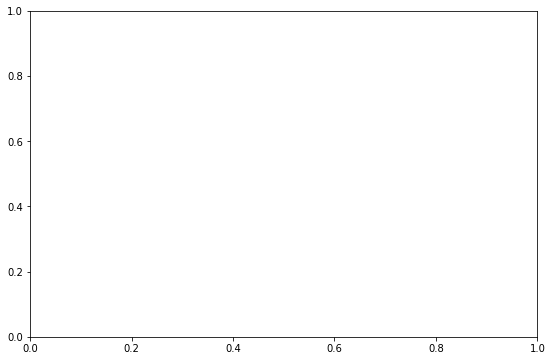

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1),
plt.plot(log_lambda,df_weights)
#lablel
plt.xlabel('Log_Lambda')
plt.ylabel('Coeffients_weights')
plt.grid()
# weight number
for i in range(13):
  plt.text(-10,df_weights.iloc[0][i],'%d'%i)

plt.plot([-2,-2],[-1.1,1.1],'k:')


plt.subplot(1,2,2)
ply.plot(log_lamda,df_loss['val_loss'])
#lablel
plt.xlabel('Log_Lambda')
plt.ylabel('Loss')
plt.grid()
plt.plot([-2,-2],[0.3,1.1],'k:')

plt.show()

KeyError: ignored

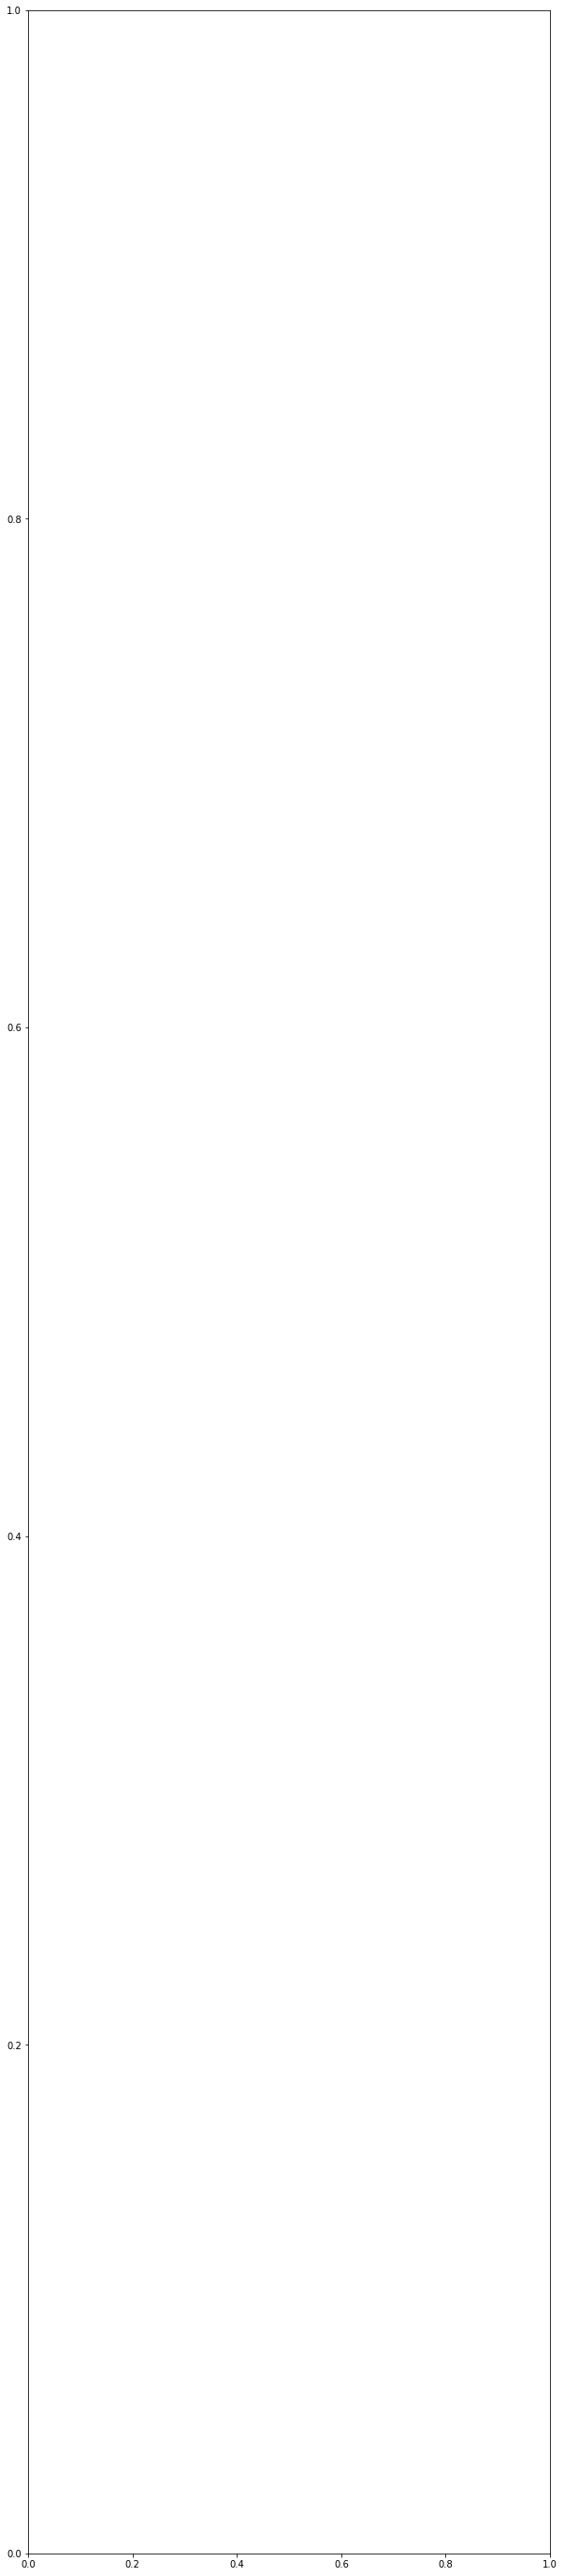

In [ ]:
plt.figure(figsize=(10,50))
plt.plot(log_lambda,df_weights)
# label
plt.xlabel('Log Lambda')
plt.ylabel('Coeffients weights')
plt.grid()
# weight number
for i in range(13):
  plt.text(-2,df_weights.iloc[32][i],'%d'%i)

plt.plot([-2,-2],[-1.1,1.1],'k:')

**Feature selected**

*** : 8,4,5

**: 10

*: 1, 0, 6, 7, 9

In [ ]:
x = pickle.load(open('preprocessing/x_norm.pickle','rb'))

In [ ]:
x.drop('index',axis=1,inplace=True)

In [ ]:
x.iloc[:,[8,4,5,10,1,0,6,7,9]].columns

Index(['NoOfGamesBought', 'FrquncyOfPurchase', 'NoOfUnitsPurchased',
       'fct_Favorite', 'MinAgeOfChild', 'NoOfChildren', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'city_1'],
      dtype='object')